<h1> Market Segmentation </h1>

<p>For the following dataset, please determine the best market segmentations for the data below - make sure to plot and explain your results when possible. The dataset is comprised of Satisfaction (discrete) and Loyalty (continuous). Please explain any considerations/assumptions you make as well as any conclusions you draw from the data. Think about these segmentations and think about what other kinds of data that might also lead to a more insightful analysis. Please include all things you tried - both what worked, and what didn't and why (very important).
Please upload your results to Github and email it back to us. Thank you.</p>

+ Successful marketing in the modern industrialized world cannot be done without separation or segmentation of the current customers and potential customers. Companies needs to understand the customer, its heterogenic needs and desires for products and services.
(Weinstein 2014b p.7) 

+ The term market segmentation is defined as knowing that neither the market nor the customers are homogenous. The market is divided into several sub segments where market
segmentation’s role is to split the existing customer base and/ or potential customers into
groups with similar attributes. The reason for doing this is that the customers or potential
customers have different ways of perceiving the value of different kinds of products. By
delivering the benefits to the customers in such way which appeals to them best, the better
results the company can achieve. The aim of doing this is by serving these groups in a
more individual manner and to tailor the offering to meet the needs of the customer. The
customers choose between competitor’s products and services in order to find the solution
that is most suitable for the needs of them for the most convenient prize. This is of course
not necessarily the cheapest product but the price which the customer sees as the most
value bringing. (Malcolm & Dunbar 2012b p. 9f)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
df = pd.read_csv(r'C:\Users\Nazanin\Downloads\market_data.csv', sep="\t")
df.head()

,"Satisfaction,Loyalty"
0,"4,-1.33"
1,"6,-0.28"
2,"5,-0.99"
3,"7,-0.29"
4,"4,1.06"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 1 columns):
Satisfaction,Loyalty    480 non-null object
dtypes: object(1)
memory usage: 3.8+ KB


In [4]:
df.isnull().sum()

Satisfaction,Loyalty    0
dtype: int64

In [5]:
df.columns

Index(['Satisfaction,Loyalty'], dtype='object')

In [6]:
df.describe()

,"Satisfaction,Loyalty"
count,480
unique,30
top,"7,1.36"
freq,16


In [7]:
print(df.columns.dtype)

object


In [8]:
df['Satisfaction,Loyalty'].unique()

array(['4,-1.33', '6,-0.28', '5,-0.99', '7,-0.29', '4,1.06', '1,-1.66',
       '10,-0.97', '8,-0.32', '8,1.02', '8,0.68', '10,-0.34', '5,0.39',
       '5,-1.69', '2,0.67', '7,0.27', '9,1.36', '8,1.38', '7,1.36',
       '7,-0.34', '9,0.67', '10,1.18', '3,-1.69', '4,1.04', '3,-0.96',
       '6,1.03', '9,-0.99', '10,0.37', '9,0.03', '3,-1.36', '5,0.73'],
      dtype=object)

In [9]:
type(df.columns)

pandas.core.indexes.base.Index

In [10]:
df.dtypes

Satisfaction,Loyalty    object
dtype: object

In [11]:
df[['Satisfaction','Loyalty']] = df['Satisfaction,Loyalty'].apply(lambda x: pd.Series(str(x).split(",")))

In [12]:
df = df[['Satisfaction','Loyalty']]

In [13]:
df.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [14]:
df.columns

Index(['Satisfaction', 'Loyalty'], dtype='object')

In [15]:
df.describe()

,Satisfaction,Loyalty
count,480,480
unique,10,25
top,7,-0.99
freq,64,32


In [16]:
print(df.columns.dtype)

object


In [17]:
type(df.columns)

pandas.core.indexes.base.Index

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
Satisfaction    480 non-null object
Loyalty         480 non-null object
dtypes: object(2)
memory usage: 7.6+ KB


In [19]:
df.Satisfaction.astype('float')

0       4.0
1       6.0
2       5.0
3       7.0
4       4.0
5       1.0
6      10.0
7       8.0
8       8.0
9       8.0
10     10.0
11      5.0
12      5.0
13      2.0
14      7.0
15      9.0
16      8.0
17      7.0
18      7.0
19      9.0
20     10.0
21      3.0
22      4.0
23      3.0
24      6.0
25      9.0
26     10.0
27      9.0
28      3.0
29      5.0
       ... 
450     4.0
451     6.0
452     5.0
453     7.0
454     4.0
455     1.0
456    10.0
457     8.0
458     8.0
459     8.0
460    10.0
461     5.0
462     5.0
463     2.0
464     7.0
465     9.0
466     8.0
467     7.0
468     7.0
469     9.0
470    10.0
471     3.0
472     4.0
473     3.0
474     6.0
475     9.0
476    10.0
477     9.0
478     3.0
479     5.0
Name: Satisfaction, Length: 480, dtype: float64

In [20]:
type(df.Satisfaction)

pandas.core.series.Series

In [21]:
df.Satisfaction.describe()  #we just made it astyoe(float!!!)

count     480
unique     10
top         7
freq       64
Name: Satisfaction, dtype: object

In [22]:
type(df['Satisfaction'])

pandas.core.series.Series

In [23]:
df['Satisfaction'] = df.Satisfaction.astype('float')

In [24]:
df.Satisfaction.describe()  

count    480.000000
mean       6.400000
std        2.579508
min        1.000000
25%        4.000000
50%        7.000000
75%        9.000000
max       10.000000
Name: Satisfaction, dtype: float64

In [25]:
df.Loyalty.astype('float')

0     -1.33
1     -0.28
2     -0.99
3     -0.29
4      1.06
5     -1.66
6     -0.97
7     -0.32
8      1.02
9      0.68
10    -0.34
11     0.39
12    -1.69
13     0.67
14     0.27
15     1.36
16     1.38
17     1.36
18    -0.34
19     0.67
20     1.18
21    -1.69
22     1.04
23    -0.96
24     1.03
25    -0.99
26     0.37
27     0.03
28    -1.36
29     0.73
       ... 
450   -1.33
451   -0.28
452   -0.99
453   -0.29
454    1.06
455   -1.66
456   -0.97
457   -0.32
458    1.02
459    0.68
460   -0.34
461    0.39
462   -1.69
463    0.67
464    0.27
465    1.36
466    1.38
467    1.36
468   -0.34
469    0.67
470    1.18
471   -1.69
472    1.04
473   -0.96
474    1.03
475   -0.99
476    0.37
477    0.03
478   -1.36
479    0.73
Name: Loyalty, Length: 480, dtype: float64

In [26]:
df['Loyalty'] = df.Loyalty.astype('float')

In [27]:
df.Loyalty.describe()

count    480.000000
mean       0.001000
std        1.000434
min       -1.690000
25%       -0.970000
50%        0.150000
75%        1.020000
max        1.380000
Name: Loyalty, dtype: float64

In [28]:
df.Satisfaction.describe() 

count    480.000000
mean       6.400000
std        2.579508
min        1.000000
25%        4.000000
50%        7.000000
75%        9.000000
max       10.000000
Name: Satisfaction, dtype: float64

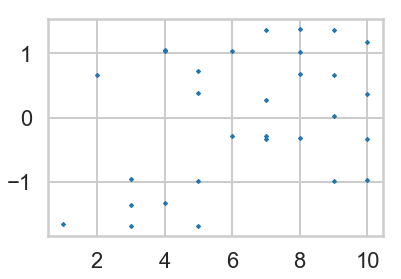

In [31]:
plt.scatter(df.Satisfaction, df.Loyalty, s=2)